# Tara delmont eval

relaxed parameters:
```
match_rank: genus
```

strict_parameters:
```
 match_rank: order
```

In [34]:
# code to load contig reports
import glob
import csv
import os

def load_contig_reports(dirname):
    report_csvs = glob.glob(os.path.join(dirname, '*.contigs.csv'))
    d = {}
    for n, filename in enumerate(report_csvs):
        if n % 100 == 0:
            print(f'... loading {dirname} file {n} of {len(report_csvs)}')
        with open(filename, 'rt') as fp:
            for row in csv.DictReader(fp):
                key = (row['genomefile'], row['contig_name'])
                d[key] = row
    return d
    
strict = load_contig_reports('../eval.output.tara-delmont.strict/')
relaxed = load_contig_reports('../eval.output.tara-delmont.relaxed/')

... loading ../eval.output.tara-delmont.strict/ file 0 of 957
... loading ../eval.output.tara-delmont.strict/ file 100 of 957
... loading ../eval.output.tara-delmont.strict/ file 200 of 957
... loading ../eval.output.tara-delmont.strict/ file 300 of 957
... loading ../eval.output.tara-delmont.strict/ file 400 of 957
... loading ../eval.output.tara-delmont.strict/ file 500 of 957
... loading ../eval.output.tara-delmont.strict/ file 600 of 957
... loading ../eval.output.tara-delmont.strict/ file 700 of 957
... loading ../eval.output.tara-delmont.strict/ file 800 of 957
... loading ../eval.output.tara-delmont.strict/ file 900 of 957
... loading ../eval.output.tara-delmont.relaxed/ file 0 of 957
... loading ../eval.output.tara-delmont.relaxed/ file 100 of 957
... loading ../eval.output.tara-delmont.relaxed/ file 200 of 957
... loading ../eval.output.tara-delmont.relaxed/ file 300 of 957
... loading ../eval.output.tara-delmont.relaxed/ file 400 of 957
... loading ../eval.output.tara-delmont

In [35]:
# calculate those with explicit "dirty" flags

removed_strict = set()
for k, row in strict.items():
    if row['decision'] == 'ContigInfo.DIRTY':
        removed_strict.add(k)
print(f'removed {len(removed_strict)} of {len(strict)} during strict')

removed_relaxed = set()
for k, row in relaxed.items():
    if row['decision'] == 'ContigInfo.DIRTY':
        removed_relaxed.add(k)
print(f'removed {len(removed_relaxed)} of {len(relaxed)} during relaxed')

removed 3627 of 239519 during strict
removed 4799 of 238843 during relaxed


In [36]:
%pylab inline
import matplotlib_venn

Populating the interactive namespace from numpy and matplotlib


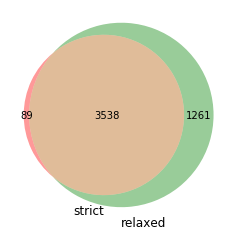

In [37]:
matplotlib_venn.venn2([removed_strict, removed_relaxed], set_labels=['strict', 'relaxed'])

In [38]:
intersection = removed_strict.intersection(removed_relaxed)
union = removed_strict.union(removed_relaxed)
only_strict = removed_strict - removed_relaxed 
only_relaxed = removed_relaxed - removed_strict

print(f'{len(intersection) / len(union) * 100:.1f}% in intersection')
print(f'{len(only_strict) / len(union) * 100:.1f}% only in strict')
print(f'{len(only_relaxed) / len(union) * 100:.1f}% only in relaxed')

72.4% in intersection
1.8% only in strict
25.8% only in relaxed


## First round questions/observations:

Only a ~25% difference between genus and order level decontam!! Seems good.

Q: why are there some that are only in strict? perhaps because genus level assignments are required for relaxed, but not all contigs can get genus level assignments? this seems like something to fix.